# 经济学的沙盒

##  1. 市场的定义
**市场**$ \mathbb M $是一个7元组。$\mathbb M=<T,P,G,H_t,C_t,D_t,\{J_{g}\}_{g \in G}>$
- **时间** $t，t = 0, 1, 2 ...$
- **参与人集合** $P，p \in P$
- **商品集合** $G，g \in G$
- **持有矩阵** $H^{(t)}$，大小为 $|P| \times |G|$ 。参与人$p$持有的商品$g$的数量为$h_{p,g}$
- **消费矩阵** $C^{(t)} $，同上类似。
- **生产矩阵** $D^{(t)} $，类似。
- **愉悦函数** $\{J_{p,g}\}_{p \in P,g \in G}$，从“某人拥有某商品的数量”到“该人的愉悦程度”的映射。$J_{p,g} :  \mathbb R \rightarrow \mathbb R^k $。简单起见，也可以令愉悦函数与人无关，于是愉悦函数定义为 $\{J_{g}\}_{g \in G}$

根据韦伯-费希纳定律，$J$一般为对数函数形式。

In [1]:
import random
import math
import numpy as np
Players=['小明','小强','小丽']
Goods=['钻石','苹果','水']


#商品的持有
currentholds=np.zeros((len(Players),len(Goods)))
history_holds=[]
def getHolds(p,g,t):
    return history_holds[t][Players.index(p)][Goods.index(g)]
def setHolds(p,g):
    history_holds.append(currentholds)


#钱
currenmholds=np.zeros(len(Players))
history_mholds=[]
def getMHolds(p,t):
    return history_mholds[t][Players.index(p)]
def setMHolds(p):
    history_mholds.append(currenmholds)

#消费
current_consum=np.zeros((len(Players),len(Goods)))
histroy_consum=[]
def getConsum(p,g,t):
    return history_consum[t][Players.index(p)][Goods.index(g)]
def setConsum(p,g):
    histroy_consum.append(current_consum)

#生产
current_produce=np.zeros((len(Players),len(Goods)))
histroy_produce=[]
def getProduce(p,g,t):
    return history_produce[t][Players.index(p)][Goods.index(g)]
def setProduce(p,g):
    histroy_produce.append(current_produce)

#需求 
# from sympy import * 
happinessfun=[]
marginal_hapfun=[]
for p in range(len(Players)):
    happinessfun.insert(p,[])
    marginal_hapfun.insert(p,[])
    for g in range(len(Goods)):
        if g==0:#钻石
            happinessfun[p].insert(g,lambda n:0.5 * math.log(n+1))
            marginal_hapfun[p].insert(g,lambda n:0.5*1/(n+1))
        elif g==1:#苹果
            happinessfun[p].insert(g,lambda n:5 * math.log(n))
            marginal_hapfun[p].insert(g,lambda n:5*1/(n))
        elif g==2:#水
            happinessfun[p].insert(g,lambda n:math.atan(n))
            marginal_hapfun[p].insert(g,lambda n:1/(1+n^2))


def gethappiness(p,g,n):
    return happinessfun[Players.index(p)][Goods.index(g)](n)


In [131]:
happinessfun[2][2](11)

1.4801364395941514

## 2. 市场的起源——物物交换阶段
### 2.1 交换
- 定义1：**交换**$e$是一个7元组。$e=<p_1,p_2,g_1,g_2,h_{p_1,g_1},h_{p_1,g_2},h_{p_2,g_1},h_{p_2,g_2},r>$
- 定义2：已知$p_1$拥有$h$个商品$g_1$和$h_2$个商品$g_2$，$g_1$和$g_2$的交换比率为$r$。定义$p_1$对交换$e$的**交换偏好**为 $-log(\frac{ J'_{p,g}(h)}{J'_{p,g_2}(h_2)}  \cdot r)$。
- 定义3：当交换偏好 > 0 时，称交换$e$对$p$来说是**可接受的**。

仅当交换e对参与人$p_1$和$p_2$都是可接受的，且两人分别拥有的g和g2的商品数量大于0时，才可能发生**交换**。


- 定理1(?)：一个交换最大化所有人的交换偏好之和，当且仅当该交换最大化所有人的愉悦值之和。
- 定理2：如果所有人的愉悦函数是单调上升的，且存在交换比率$r$，使交换对$p_1$和$p_2$都是可接受的。则必然存在交换比率$r'$，在该比例下$p_1$和$p_2$的交换偏好相等。称其为**平等交换**。

### 2.2 分配
- 定义4：一个分配$R$是一个4元组。$R=<P',G',H_{P',G'},R>$,其中：$P'\in P, G'\in G, H_{P',G'}$为$H$的子矩阵，$R$为交换比率矩阵。
- 定义5：在多人之间重新分配商品，且使所有人的愉悦值增加，称该分配对所有人是**可接受的**。
- 定理3：分配$R$可以等价为一个交换的序列:$R=(e_1,e_2,...e_n)$。一个可接受的分配，其对应的每一个交换不一定是可接受的。
- 定义6：对一个交换$e$，如果存在一个可接受的分配$R=(e_1,e_2,...e_n)$使得$e=e_1$，则称该交换是**弱可接受的**。



In [5]:

currentholds=[[3,3,3],
              [3,3,3],
              [3,3,3]]
currenmholds=[3,3,3]

current_produce=[[1,0,1],
                [0,3,2],
                [0,1,5]]
tick_now=0


def exchange_pefer(p,g,g2,h,h2,lg_r):
    k1=marginal_hapfun[p][g](h)
    k2=marginal_hapfun[p][g2](h2)
    return -1*math.log(k1/k2*math.exp(-lg_r))

#交换比率-偏好函数，横轴为交换比率的负对数，纵轴为偏好程度
#def exrate_pefer_fun(lgr)
#    return exchange_pefer(p,g,g2,h,h2,math.exp(lgr))



for p in range(len(Players)):
    for g in range(len(Goods)):        
        for p2 in range(len(Players)):
            for g2 in range(len(Goods)):
                1
                #if exchange_pefer(p,g,g2,currentholds[p][g],currentholds[p][g2],)





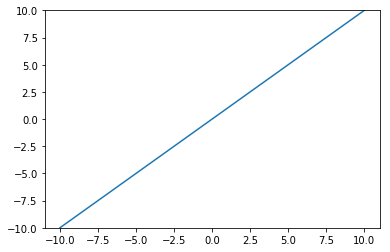

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
'''
p=0
g=0
g2=1
h=3
h2=1
'''

def plotfun(p,g,g2,h,h2):   
    #plt.figure(2)
    xlin = np.linspace(-10, 10, num=1000)
    plt.plot(xlin,[exchange_pefer(p,g,g2,h,h2,x) for x in xlin])
    plt.ylim(-10, 10)
    plt.show()

interactive_plot=interactive(plotfun,\
         p=[(x,Players.index(x)) for x in Players],\
         g=[(x,Goods.index(x)) for x in Goods],\
         g2=[(x,Goods.index(x)) for x in Goods],\
         h=(0,20),\
         h2=(0,20),\
        );


interactive_plot

In [4]:
W1=[[1,-2],
    [3,2]]
x=[4,6]
h = np.dot(W1, x)
print((h))
h<0

[-8 24]


array([ True, False])

In [13]:
def f(x):
    return 2*x
interact(f, x=10);

20